In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Jumlah Penumpang')

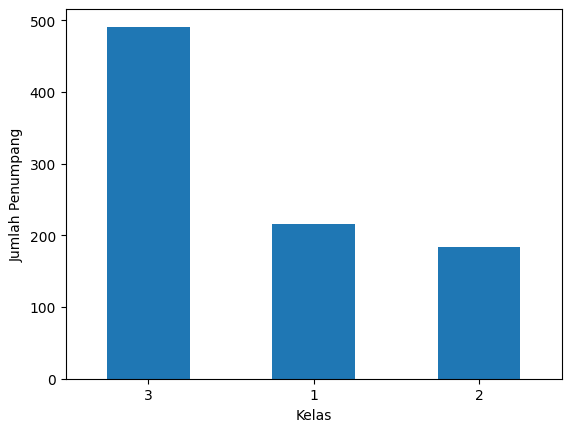

In [12]:
dt = train_data['Pclass'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Kelas')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Jumlah Penumpang')

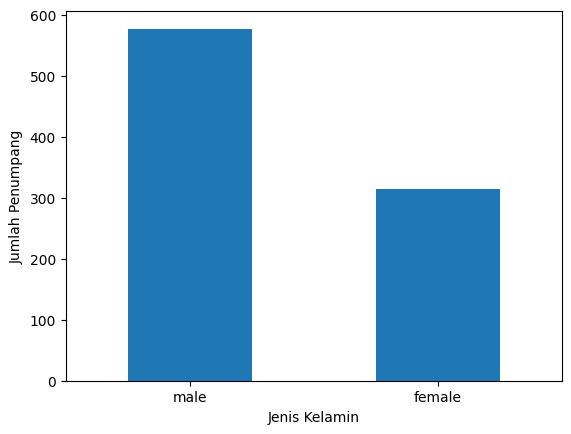

In [15]:
dt = train_data['Sex'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Jenis Kelamin')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Jumlah Penumpang')

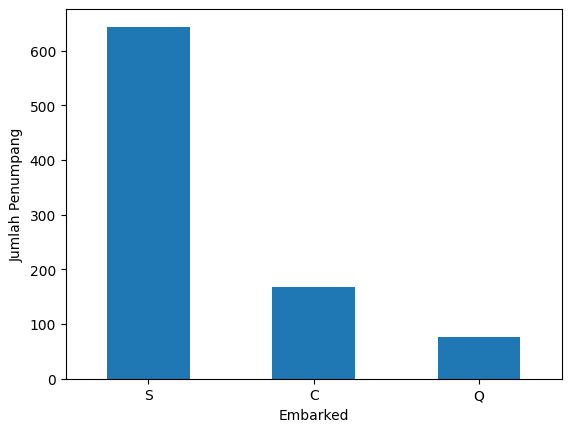

In [18]:
dt = train_data['Embarked'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Embarked')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Probabilitas Selamat')

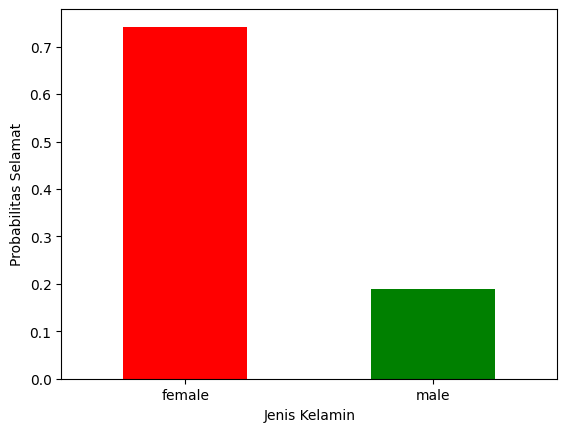

In [19]:
dt = train_data[['Sex', 'Survived']].groupby(
    'Sex').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Jenis Kelamin')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

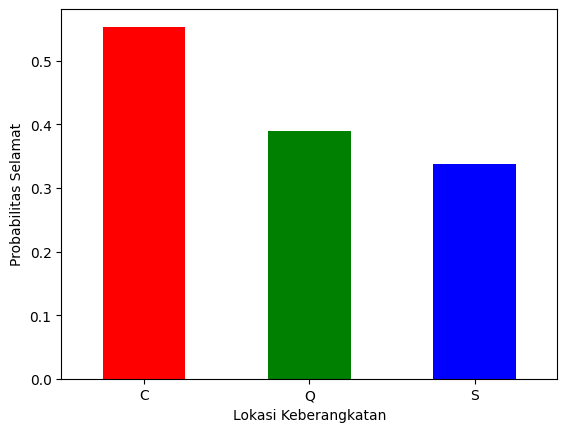

In [20]:
dt = train_data[['Embarked', 'Survived']].groupby(
    'Embarked').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Lokasi Keberangkatan')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

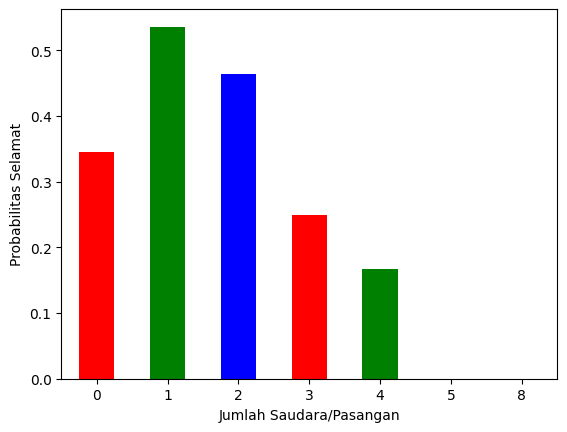

In [21]:
dt = train_data[['SibSp', 'Survived']].groupby(
    'SibSp').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Jumlah Saudara/Pasangan')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

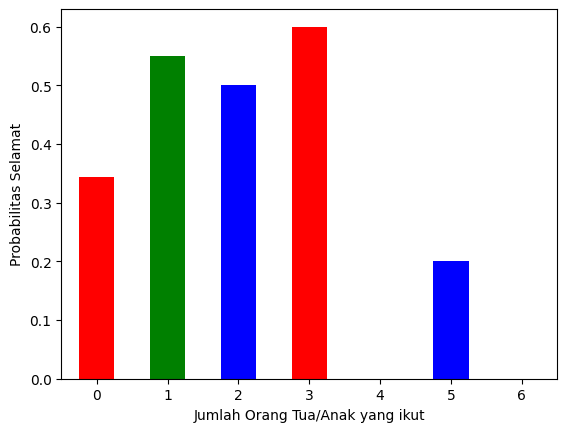

In [22]:
dt = train_data[['Parch', 'Survived']].groupby(
    'Parch').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Jumlah Orang Tua/Anak yang ikut')
plt.set_ylabel('Probabilitas Selamat')

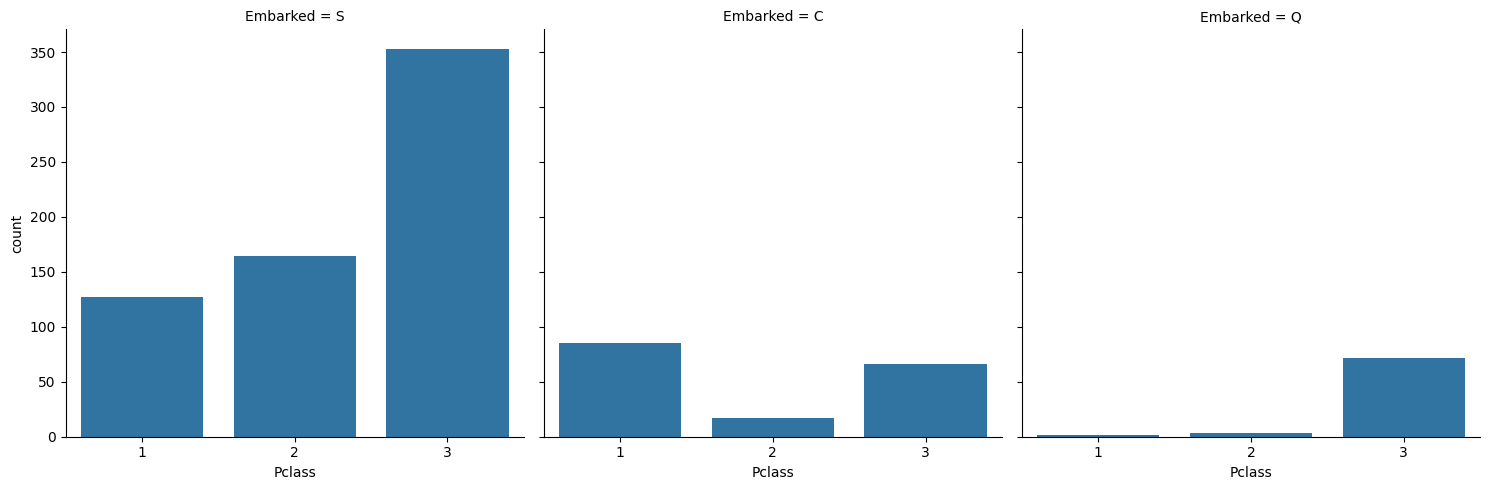

In [23]:
sns.catplot(x='Pclass', col='Embarked', data=train_data, kind='count')

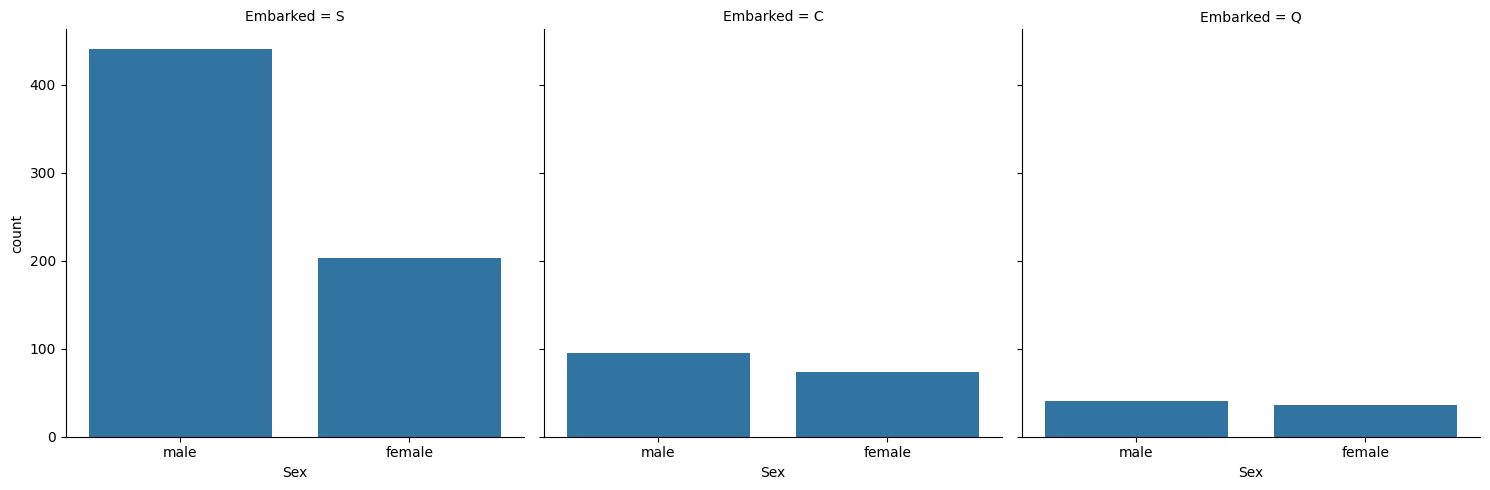

In [24]:
sns.catplot(x='Sex', col='Embarked', data=train_data, kind='count')

In [25]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\\.', expand=False)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",2.0,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",2.0,35.0,0,0,373450,8.0500,NaN,S,2.0


In [33]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric_columns].corr()
